In [9]:
from scipy.constants import g, G
from astropy.constants import R_earth, M_earth
from IPython.display import Latex
M_moon = 0.07346e24
r = 3.844e8

coeff  = G*M_moon/r**3
accel_scale = 2 * coeff * R_earth.value
Latex(f"tidal acceleration = {accel_scale:.2e} $\mathrm{{m/s^2}}$ = {accel_scale/g:.2e} g")

<IPython.core.display.Latex object>

In [11]:
h = 15 * M_moon * R_earth.value ** 4 / ( 8 * M_earth.value * r **3)
Latex(f"size of tidal bulge = {h:.2f} $\mathrm{{m}}$")

<IPython.core.display.Latex object>

$h=\dfrac{3MR_{\text{E}}^4}{4M_{\text{E}}r^3}\zeta $, where $\zeta\approx 5/2 $

[公式来源](https://www.sciencedirect.com/science/article/abs/pii/0019103566900510?via%3Dihub)

In [17]:
X = np.linspace(-1.1, 1.1, 23, endpoint=True)
Y = np.linspace(-1.1, 1.1, 23, endpoint=True)
R_x, R_y = np.meshgrid(R_earth.value * X, R_earth.value*Y)
R = np.sqrt(R_x **2 + R_y **2)
accel_x = np.ma.masked_where(R> R_earth.value, 2 * coeff * R_x)
accel_y = np.ma.masked_where(R> R_earth.value, - coeff * R_y)

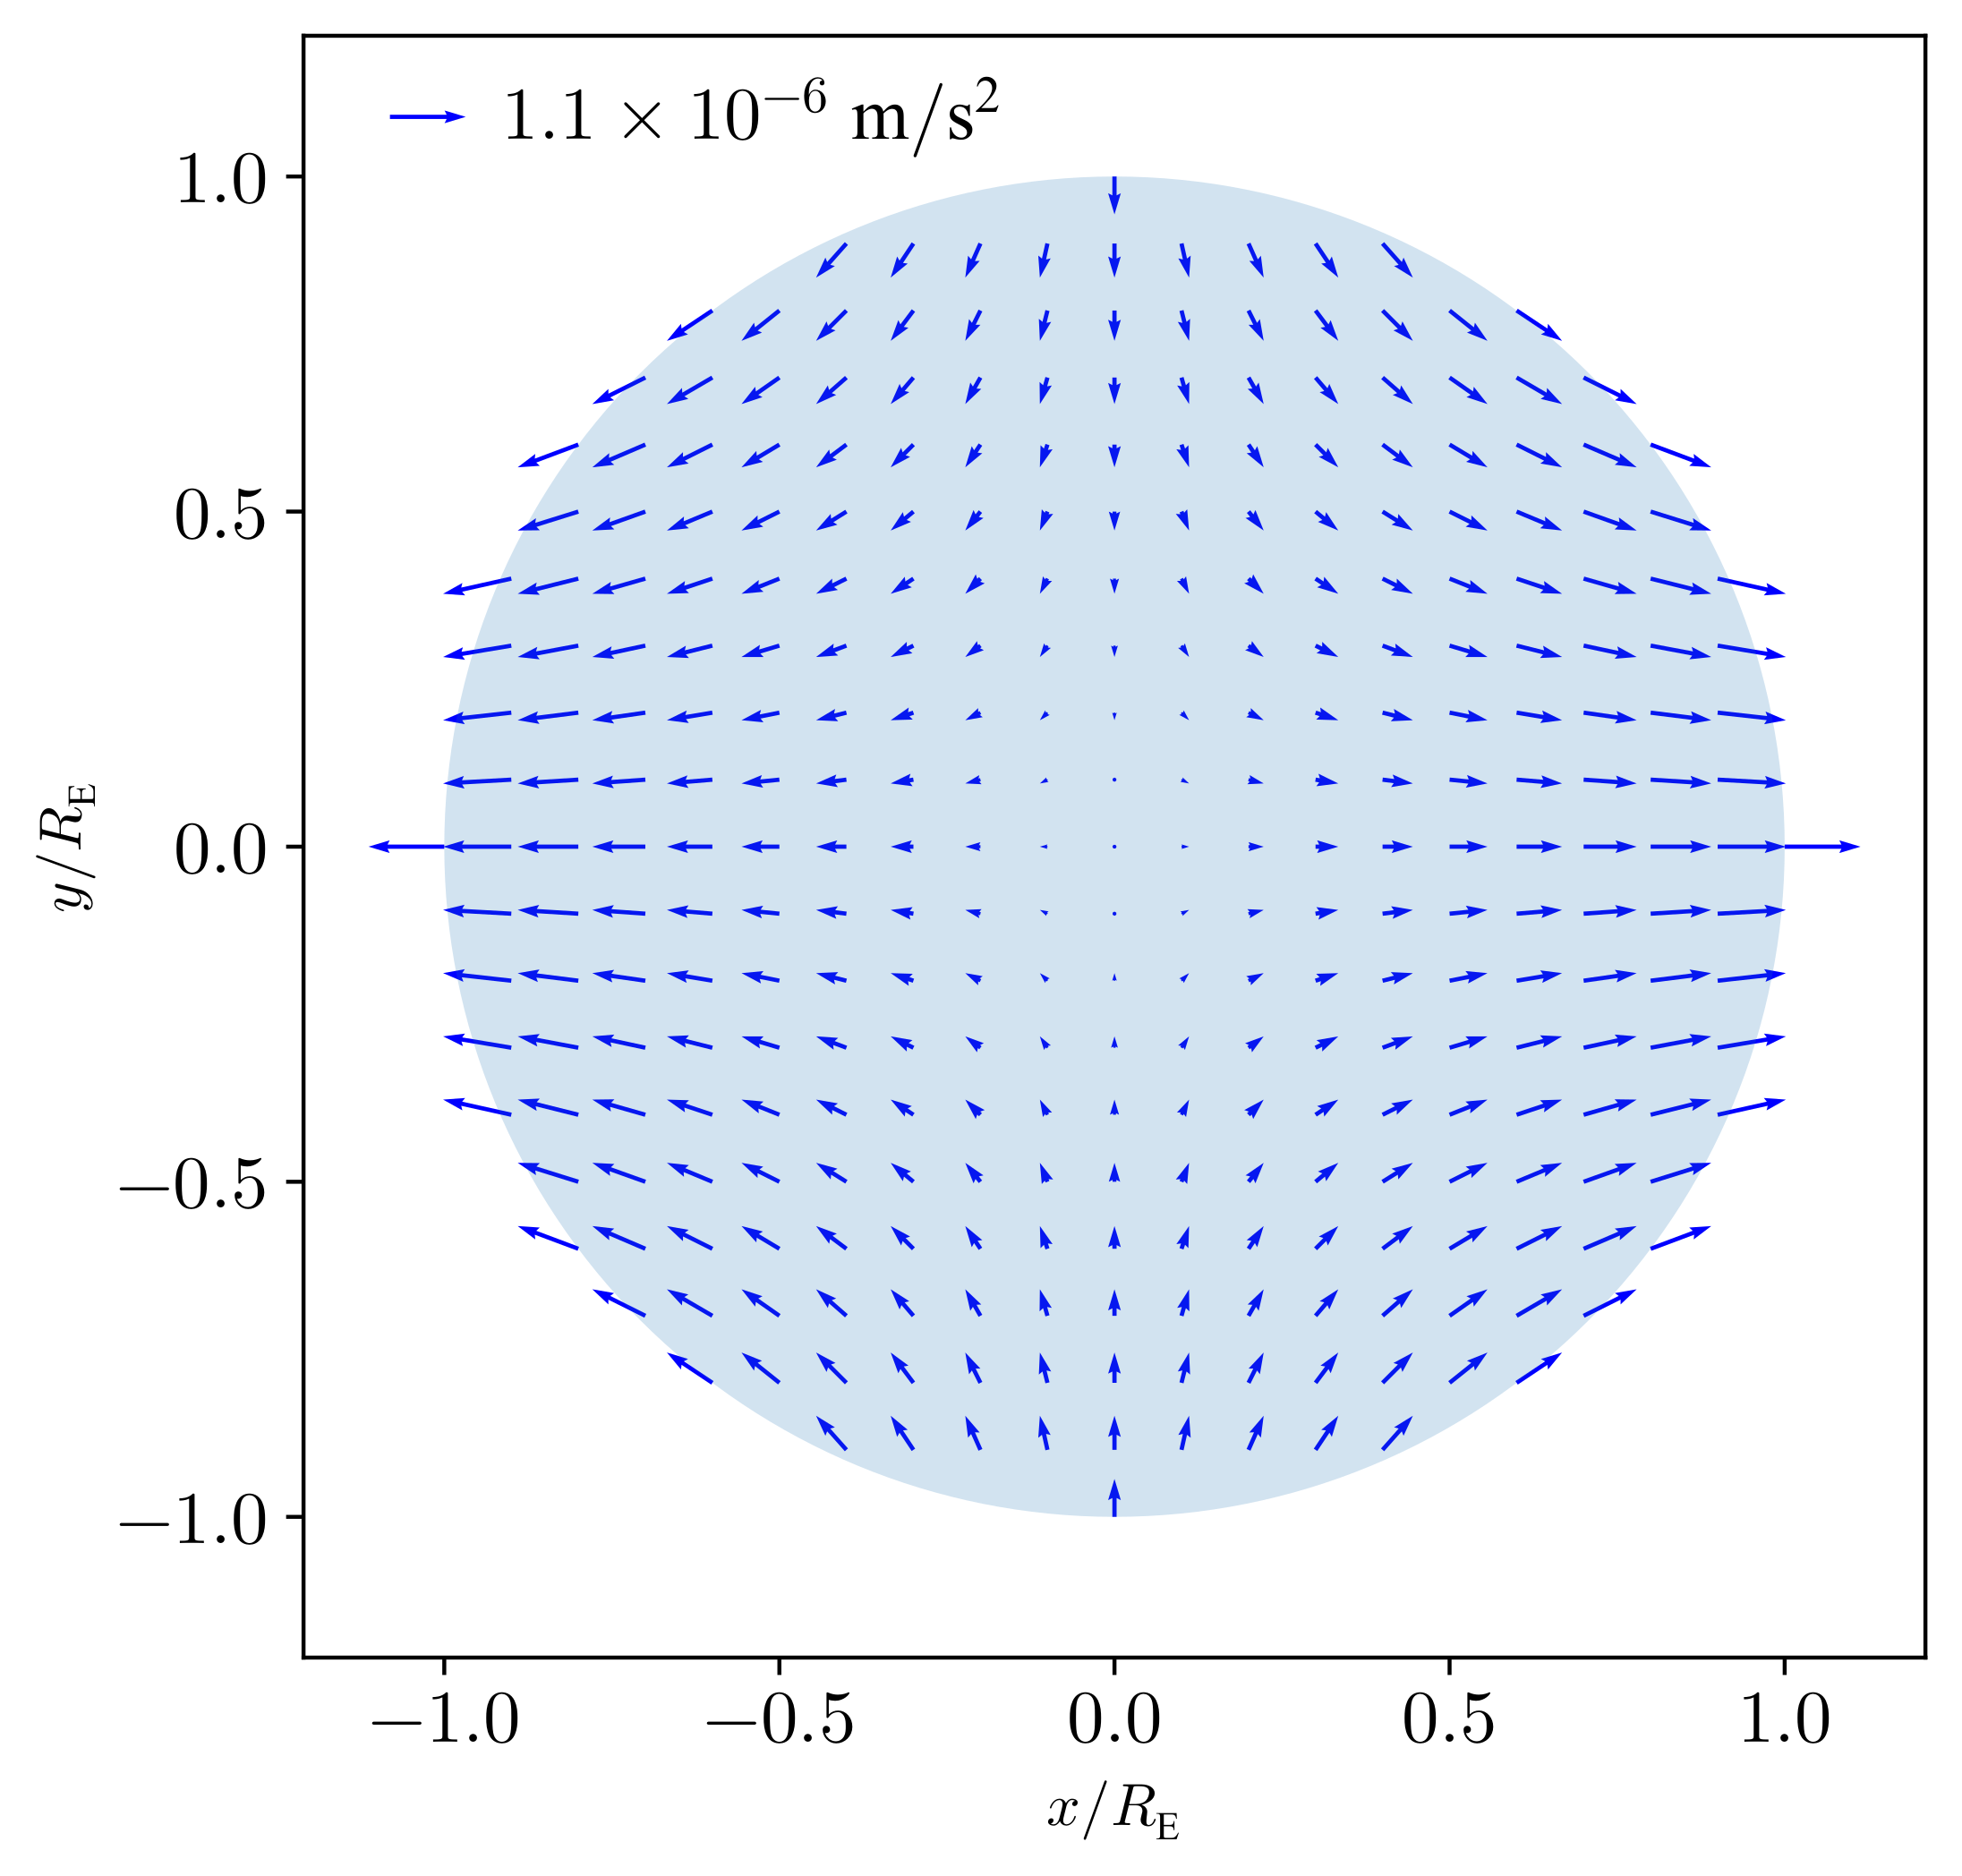

In [24]:
from matplotlib.patches import Circle
plt.figure()
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')

arrows = ax.quiver(X,  Y, accel_x, accel_y, color='blue')
ax.quiverkey(arrows, X=.1, Y=.95, U=accel_scale,
            label=r"$1.1\times 10^{-6}\;\mathrm{m/s^2}$",
            labelpos='E')
circle = Circle((0, 0), 1, alpha=.2, ec='none')
ax.add_patch(circle)
ax.set_xlabel(r"$x/R_{\mathrm{E}}$", fontsize=12)
ax.set_ylabel(r"$y/R_{\mathrm{E}}$", fontsize=12);
plt.gcf()